In [1]:
import logging
import warnings

import pandas as pd

from technical_index.binance import get_futures_market_data
from technical_index.index import (build_indicator_parameters,
                                   build_quantitative_analysis)
from technical_index.plot import PlotConfig, plot_candlestick_with_indicators

# 过滤pandas警告
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
# 设置日志级别为ERROR，只显示错误信息
logging.basicConfig(level=logging.ERROR)

/Users/gx/ws/jupyter/strategy/technical-index/venv/lib/python3.13/site-packages/pandas_ta/__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
# 获取ETHUSDT的1小时K线数据，限制500条
df = get_futures_market_data("ETHUSDT", "1h", limit=500)
df.tail(5)

,Open,High,Low,Close,Volume,Number_Of_Trades,Taker_Buy_Base_Asset_Volume,Taker_Buy_Quote_Asset_Volume
Open_Time,,,,,,,,
2025-07-16 10:00:00,3161.52,3162.00,3143.15,3143.49,136314.139,147506,64185.954,2.023750e+08
2025-07-16 11:00:00,3143.50,3157.86,3143.00,3149.90,119133.373,128339,60812.531,1.915887e+08
2025-07-16 12:00:00,3149.90,3180.00,3146.26,3163.82,238858.576,245758,125653.434,3.976543e+08
2025-07-16 13:00:00,3163.82,3197.55,3157.83,3194.39,511846.353,468093,273287.460,8.693732e+08
2025-07-16 14:00:00,3194.37,3204.78,3178.00,3179.00,228573.135,172277,104738.383,3.344250e+08


In [3]:
# 构建技术指标参数
indicator_params = build_indicator_parameters(ma_periods=(5, 10, 20, 50))

# 计算技术指标
print("正在计算技术指标...")
df_with_indicators = build_quantitative_analysis(df, None, **indicator_params)
df_with_indicators.tail(5)

正在计算技术指标...


,Open,High,Low,Close,Volume,Number_Of_Trades,Taker_Buy_Base_Asset_Volume,Taker_Buy_Quote_Asset_Volume,MACD_12_26_9,MACDh_12_26_9,...,CDL_TASUKIGAP,CDL_THRUSTING,CDL_TRISTAR,CDL_UNIQUE3RIVER,CDL_UPSIDEGAP2CROWS,CDL_XSIDEGAP3METHODS,HA_open,HA_high,HA_low,HA_close
Open_Time,,,,,,,,,,,,,,,,,,,,,
2025-07-16 10:00:00,3161.52,3162.00,3143.15,3143.49,136314.139,147506,64185.954,2.023750e+08,36.513054,1.661611,...,0.0,0.0,0.0,0.0,0.0,0.0,3159.122117,3162.00,3143.150000,3152.5400
2025-07-16 11:00:00,3143.50,3157.86,3143.00,3149.90,119133.373,128339,60812.531,1.915887e+08,35.041028,0.151668,...,0.0,0.0,0.0,0.0,0.0,0.0,3155.831058,3157.86,3143.000000,3148.5650
2025-07-16 12:00:00,3149.90,3180.00,3146.26,3163.82,238858.576,245758,125653.434,3.976543e+08,34.598830,-0.232424,...,0.0,0.0,0.0,0.0,0.0,0.0,3152.198029,3180.00,3146.260000,3159.9950
2025-07-16 13:00:00,3163.82,3197.55,3157.83,3194.39,511846.353,468093,273287.460,8.693732e+08,36.296723,1.172375,...,0.0,0.0,0.0,0.0,0.0,0.0,3156.096515,3197.55,3156.096515,3178.3975
2025-07-16 14:00:00,3194.37,3204.78,3178.00,3179.00,228573.135,172277,104738.383,3.344250e+08,35.985650,0.689042,...,0.0,0.0,0.0,0.0,0.0,0.0,3167.247007,3204.78,3167.247007,3189.0375


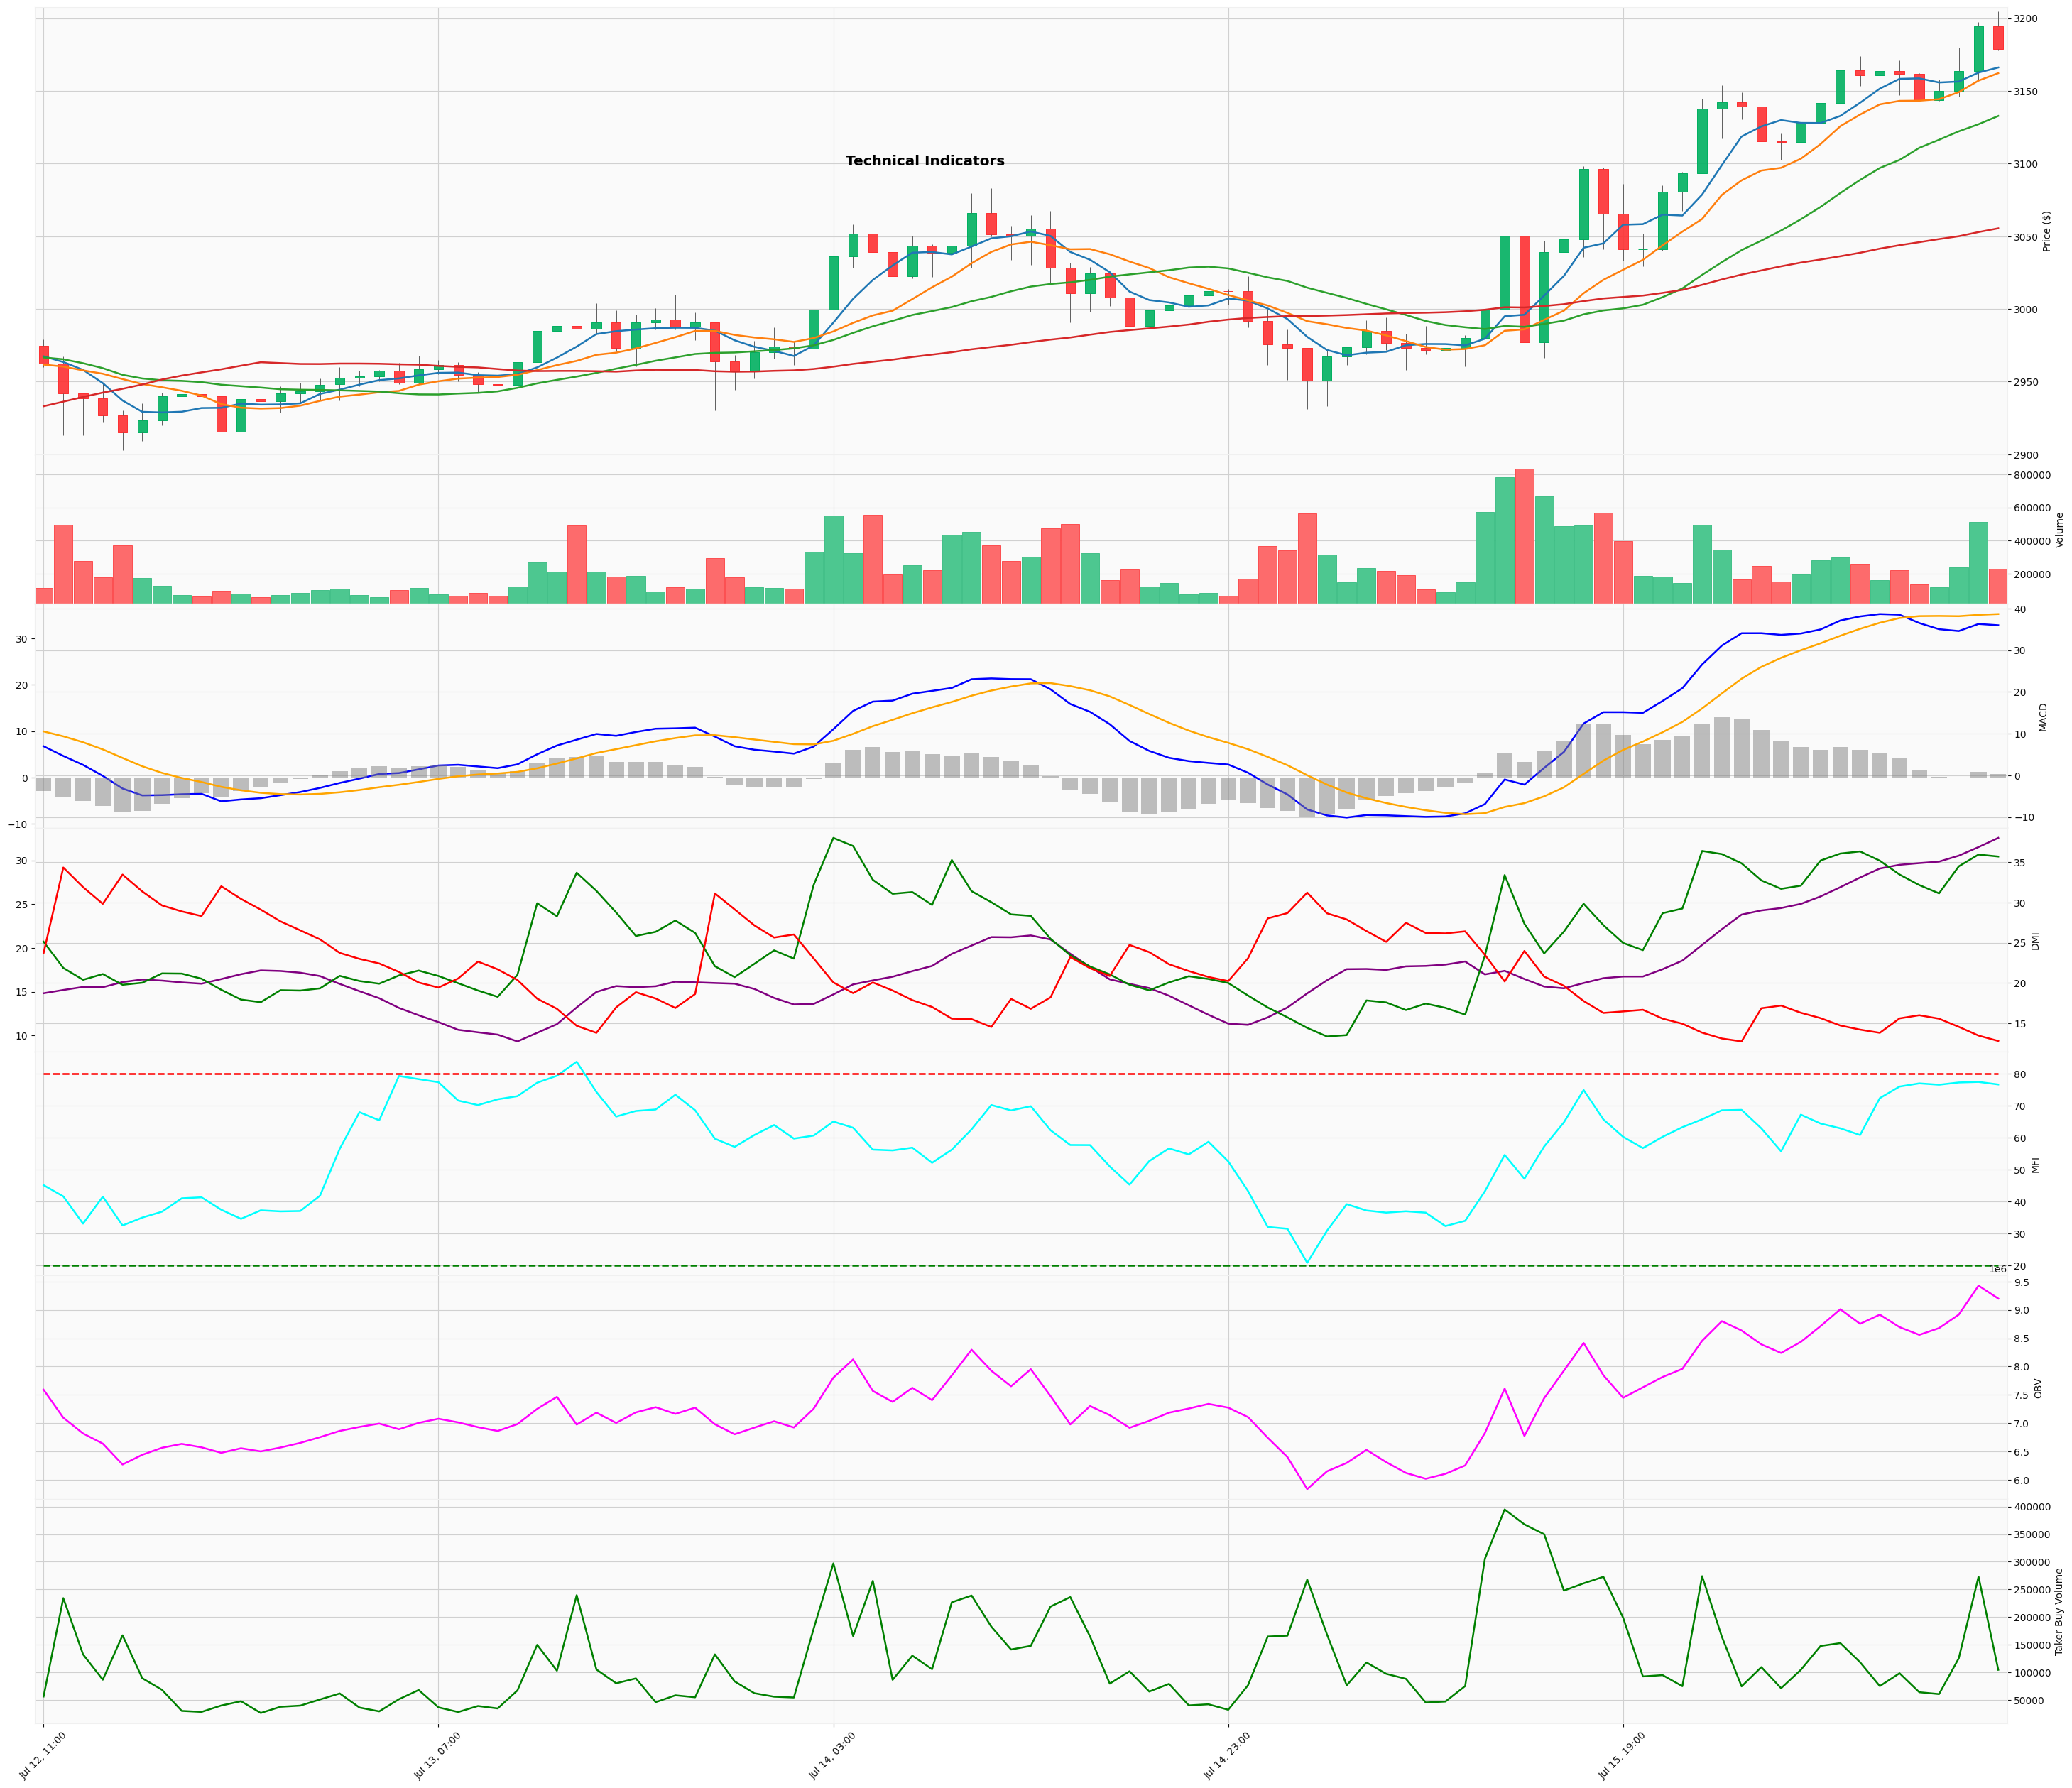

In [4]:
config = PlotConfig(
    indicators=["macd", "dmi", "mfi", "obv", "taker_buy"],
    sma_periods=(5, 10, 20, 50), # 绘制SMA线
    limit=100,
)
plot_candlestick_with_indicators(df_with_indicators, config=config)